In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import & observe the original file

In [2]:
df = pd.read_csv('loan_data.csv')
df.head(5)

,id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,loan_status,...,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,revol_bal,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int
0,571203,18000,18000,60 months,10.16%,383.87,10+ years,MORTGAGE,72804.0,Current,...,0.0,27/12/1995 2:06,NaN,21.0,8751.0,49.0,13263.18,7273.77,4736.82,2536.95
1,641849,13200,13200,36 months,18.49%,480.47,2 years,RENT,110000.0,Current,...,0.0,11/12/2000 11:15,29.0,16.0,16062.0,36.0,10546.93,4324.23,2653.07,1671.16
2,694891,15675,15675,36 months,8.90%,497.74,10+ years,MORTGAGE,100000.0,Current,...,0.0,07/04/1994 12:00,NaN,16.0,20650.0,45.0,15294.25,496.78,380.75,116.03
3,734736,21600,21600,36 months,7.90%,675.87,10+ years,MORTGAGE,95000.0,Fully Paid,...,0.0,05/05/1999 10:59,NaN,9.0,416.0,24.0,0.00,23521.69,21600.00,1921.69
4,784712,16500,16500,60 months,7.90%,333.78,2 years,MORTGAGE,42000.0,Late (31-120 days),...,0.0,16/07/1993 8:41,NaN,9.0,2229.0,17.0,12966.64,5000.85,3533.36,1467.49


Check data type

In [3]:
df.dtypes

id                          int64
loan_amnt                   int64
funded_amnt                 int64
term                       object
int_rate                   object
installment               float64
emp_length                 object
home_ownership             object
annual_inc                float64
loan_status                object
purpose                    object
addr_state                 object
dti                       float64
delinq_2yrs               float64
earliest_cr_line           object
mths_since_last_delinq    float64
open_acc                  float64
revol_bal                 float64
total_acc                 float64
out_prncp                 float64
total_pymnt               float64
total_rec_prncp           float64
total_rec_int             float64
dtype: object

Transform data type

In [4]:
# Transform data type
df['id'] = df['id'].astype(str)


# Tranform % text into numeric
df['int_rate'] = df['int_rate'].str.replace('%','').astype('float')

#Transform to date-time
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], errors= "coerce")

df.head(5)

C:\Users\CHAMP\AppData\Local\Temp\ipykernel_21164\315310027.py:9: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], errors= "coerce")


,id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,loan_status,...,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,revol_bal,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int
0,571203,18000,18000,60 months,10.16,383.87,10+ years,MORTGAGE,72804.0,Current,...,0.0,1995-12-27 02:06:00,NaN,21.0,8751.0,49.0,13263.18,7273.77,4736.82,2536.95
1,641849,13200,13200,36 months,18.49,480.47,2 years,RENT,110000.0,Current,...,0.0,2000-12-11 11:15:00,29.0,16.0,16062.0,36.0,10546.93,4324.23,2653.07,1671.16
2,694891,15675,15675,36 months,8.90,497.74,10+ years,MORTGAGE,100000.0,Current,...,0.0,1994-04-07 12:00:00,NaN,16.0,20650.0,45.0,15294.25,496.78,380.75,116.03
3,734736,21600,21600,36 months,7.90,675.87,10+ years,MORTGAGE,95000.0,Fully Paid,...,0.0,1999-05-05 10:59:00,NaN,9.0,416.0,24.0,0.00,23521.69,21600.00,1921.69
4,784712,16500,16500,60 months,7.90,333.78,2 years,MORTGAGE,42000.0,Late (31-120 days),...,0.0,1993-07-16 08:41:00,NaN,9.0,2229.0,17.0,12966.64,5000.85,3533.36,1467.49


In [5]:
df.dtypes

id                                object
loan_amnt                          int64
funded_amnt                        int64
term                              object
int_rate                         float64
installment                      float64
emp_length                        object
home_ownership                    object
annual_inc                       float64
loan_status                       object
purpose                           object
addr_state                        object
dti                              float64
delinq_2yrs                      float64
earliest_cr_line          datetime64[ns]
mths_since_last_delinq           float64
open_acc                         float64
revol_bal                        float64
total_acc                        float64
out_prncp                        float64
total_pymnt                      float64
total_rec_prncp                  float64
total_rec_int                    float64
dtype: object

Check missing values of all columns

In [6]:
df.isnull().sum()

id                           0
loan_amnt                    0
funded_amnt                  0
term                       476
int_rate                   476
installment                476
emp_length                 881
home_ownership             476
annual_inc                 476
loan_status                476
purpose                    476
addr_state                   0
dti                        476
delinq_2yrs                476
earliest_cr_line           476
mths_since_last_delinq    5900
open_acc                   476
revol_bal                  476
total_acc                  476
out_prncp                  476
total_pymnt                476
total_rec_prncp            476
total_rec_int              476
dtype: int64

Result:

Null values are approx. 5% from all data in each columns --> Imputation can be considered

Except for myhs_since_last_delinq, which 59% is null

Check duplicates

In [7]:
#check duplicates
print(df.shape)
print(df.drop_duplicates().shape)
#there is no duplicates

(10000, 23)
(10000, 23)


Observe the summarize statistical values of each numerical columns

In [8]:
df.describe()

,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,revol_bal,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int
count,10000.000000,10000.00000,9524.000000,9524.000000,9524.000000,9524.000000,9524.000000,9524,4100.000000,9524.000000,9524.000000,9524.000000,9524.000000,9524.000000,9524.000000,9524.000000
mean,14054.807500,14052.73000,14.277852,442.626605,71655.752245,17.146927,0.238765,1997-08-31 17:20:07.081058304,34.988537,11.043784,15982.998215,24.517640,10253.674229,5225.240946,3808.501311,1412.893987
min,1000.000000,1000.00000,6.030000,30.440000,7500.000000,0.000000,0.000000,1960-10-05 01:07:00,0.000000,1.000000,0.000000,3.000000,0.000000,34.140000,22.500000,11.640000
25%,8000.000000,8000.00000,11.140000,266.575000,45000.000000,11.520000,0.000000,1994-03-01 23:49:45,17.000000,8.000000,7151.000000,17.000000,4273.387500,1676.312500,1027.525000,468.112500
50%,12000.000000,12000.00000,14.090000,398.510000,61000.000000,16.840000,0.000000,1999-01-26 09:12:00,32.000000,10.000000,12495.000000,23.000000,8745.425000,3500.040000,2237.870000,947.000000
75%,19400.000000,19400.00000,17.270000,576.737500,86000.000000,22.590000,0.000000,2002-07-09 08:23:30,49.000000,14.000000,20596.000000,31.000000,15055.437500,6736.965000,4544.470000,1777.870000
max,35000.000000,35000.00000,26.060000,1388.450000,1000000.000000,34.980000,11.000000,2010-11-16 12:00:00,122.000000,39.000000,376679.000000,68.000000,34413.520000,44231.080000,35000.010000,13514.550000
std,8108.658728,8107.69323,4.430159,244.522116,45362.834495,7.591601,0.691455,NaN,21.474509,4.561028,15177.648105,10.887693,7963.300050,5499.478657,4801.501191,1489.227516


It seem that there's outliers in dataset

Cleaning data 

Before impute the missing value, observe the distribution and outliers of each numerical columns

In [9]:
#Select only numeric col
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

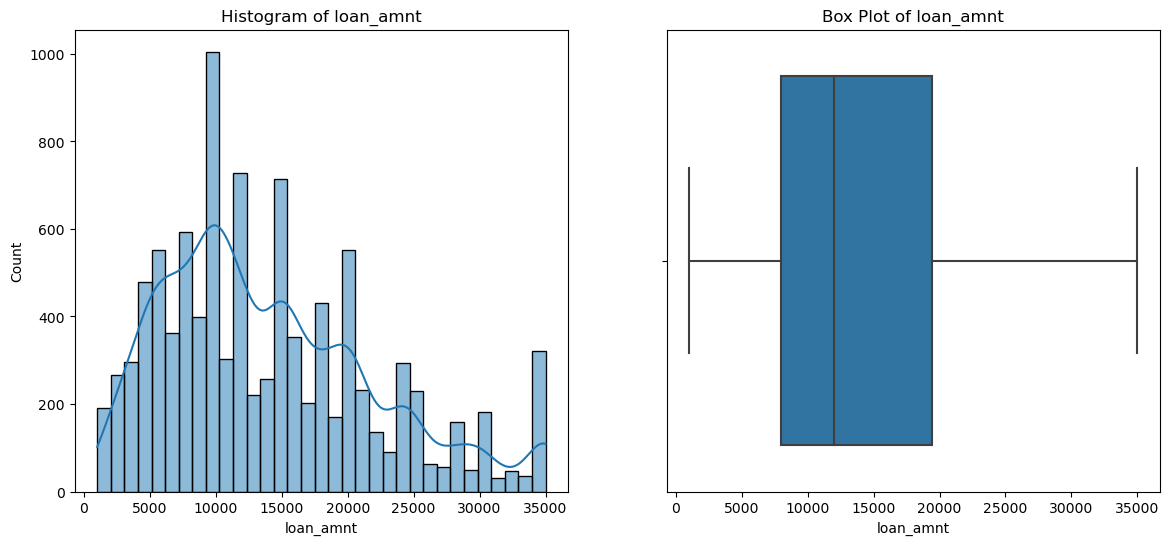

0 null values


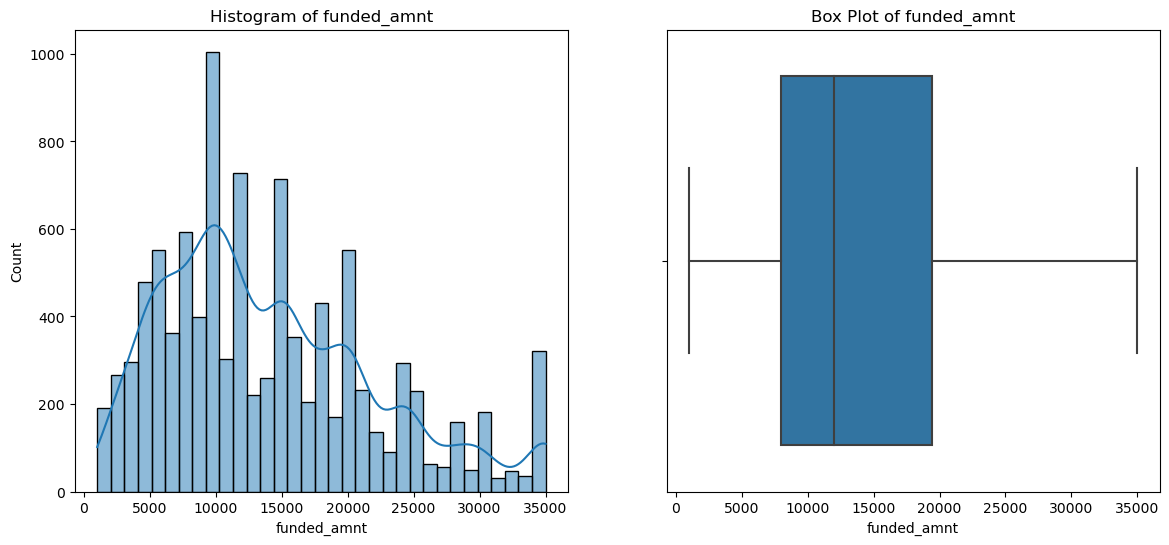

0 null values


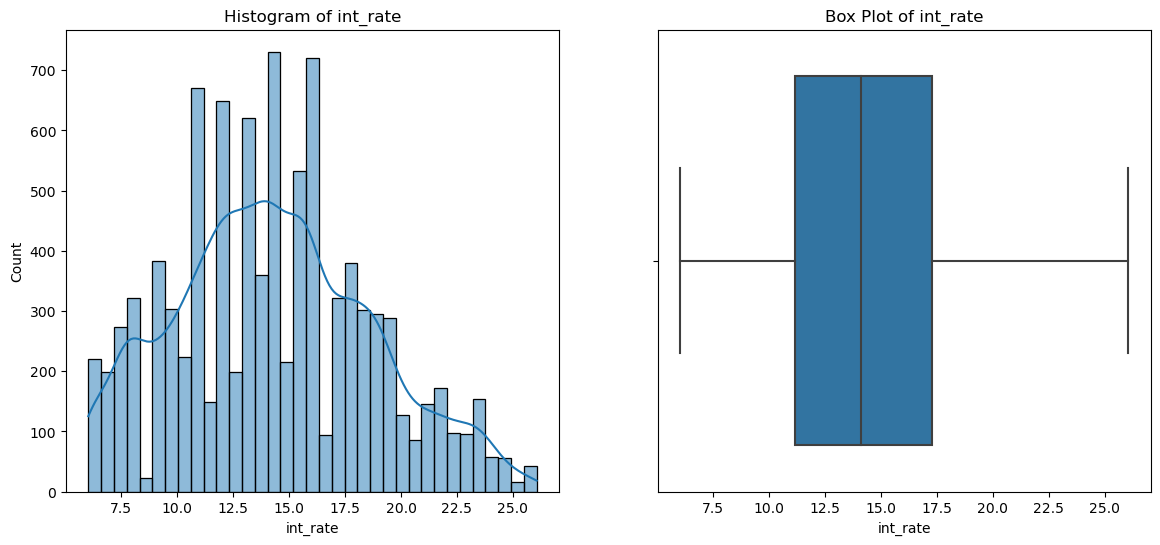

476 null values


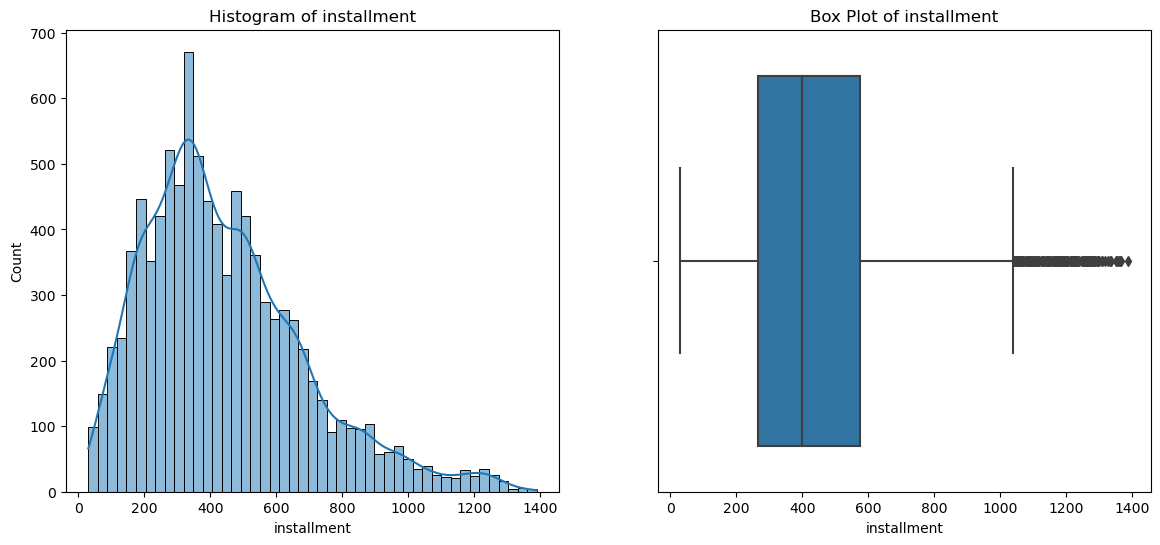

476 null values


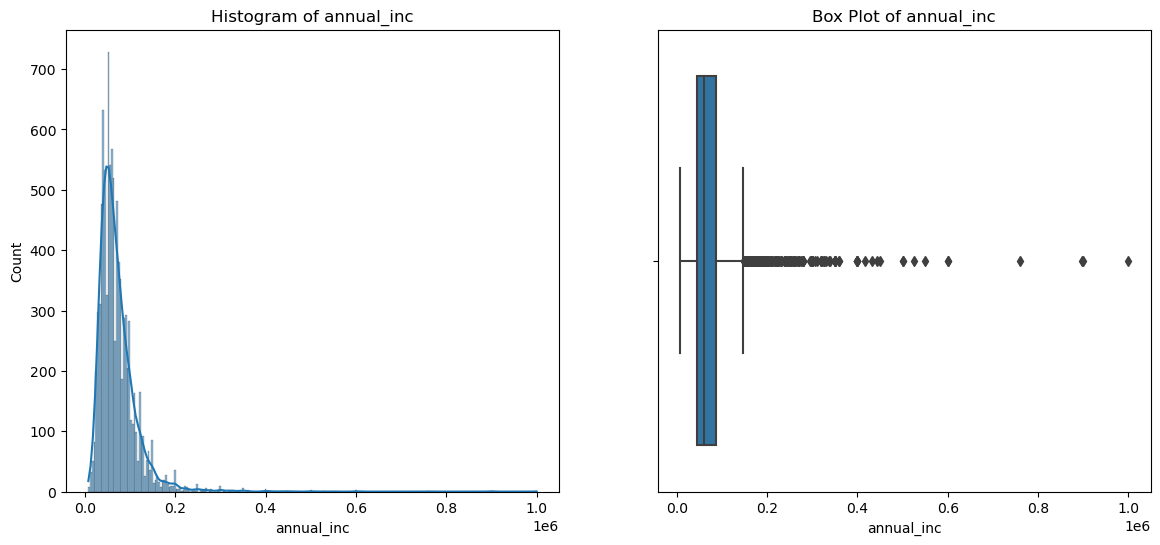

476 null values


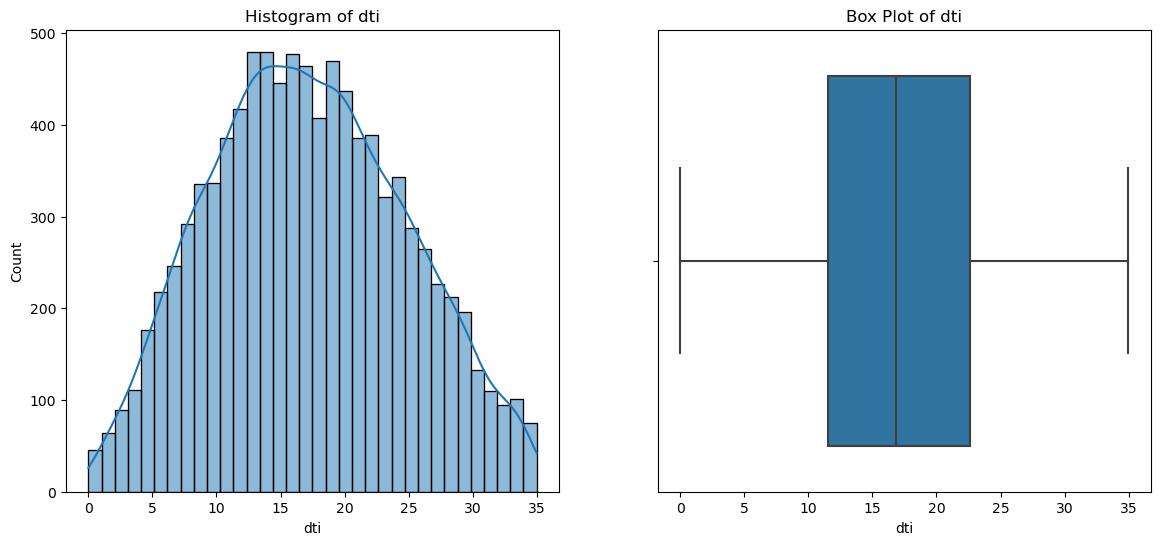

476 null values


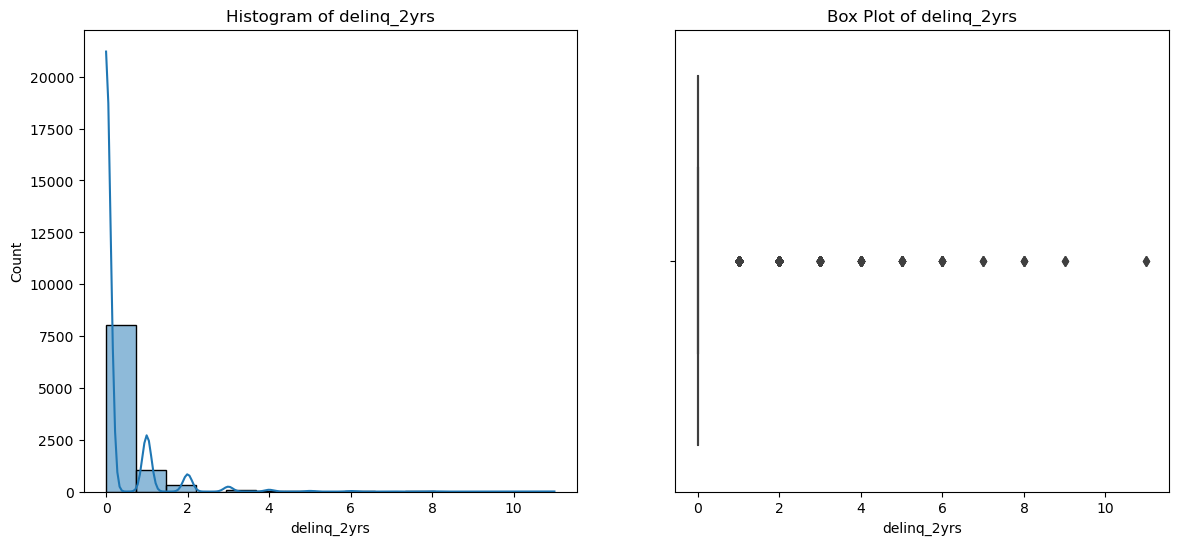

476 null values


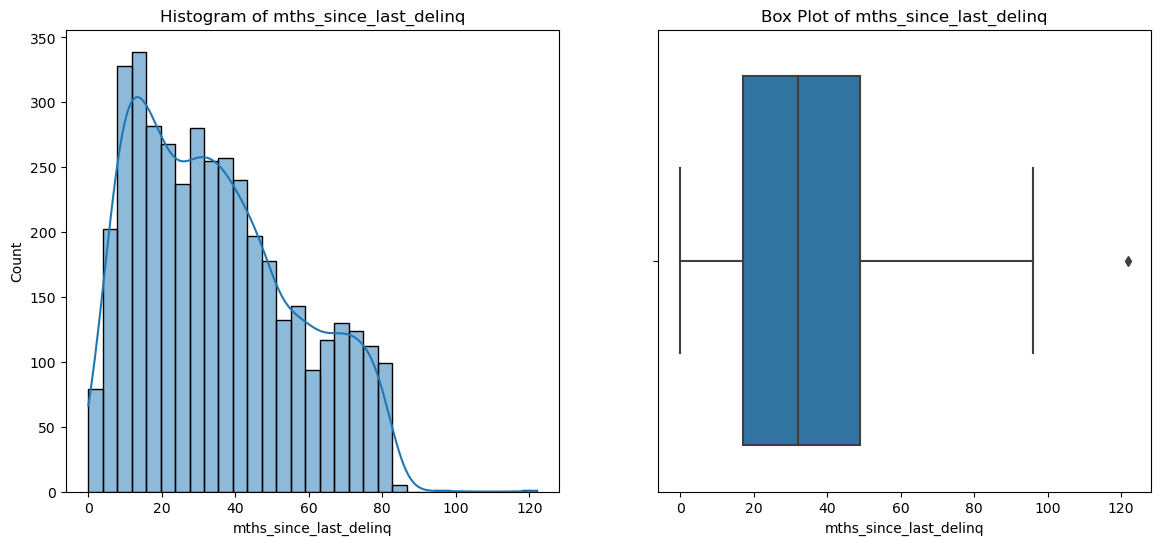

5900 null values


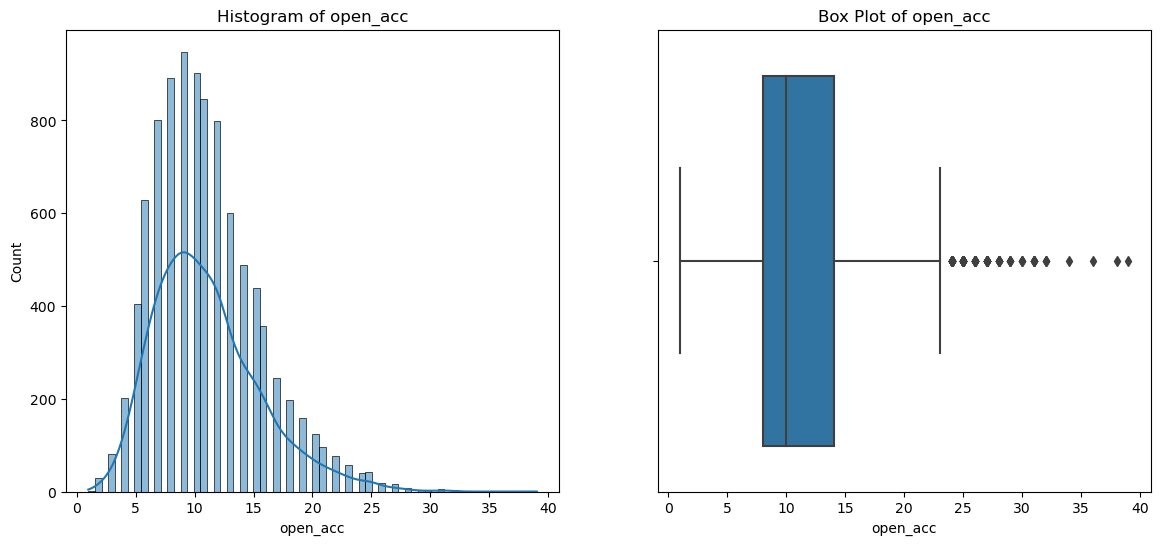

476 null values


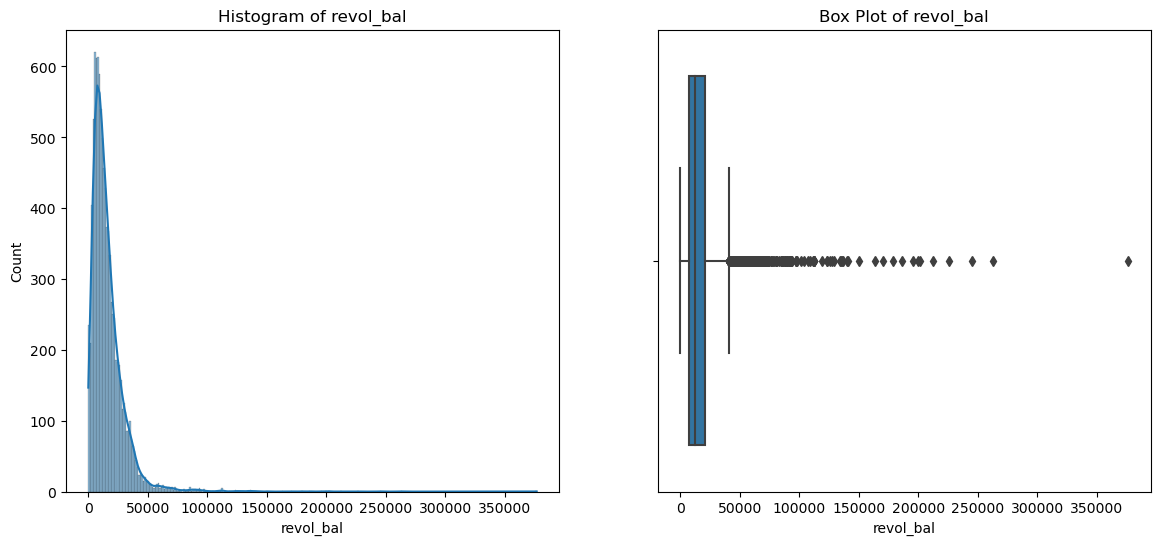

476 null values


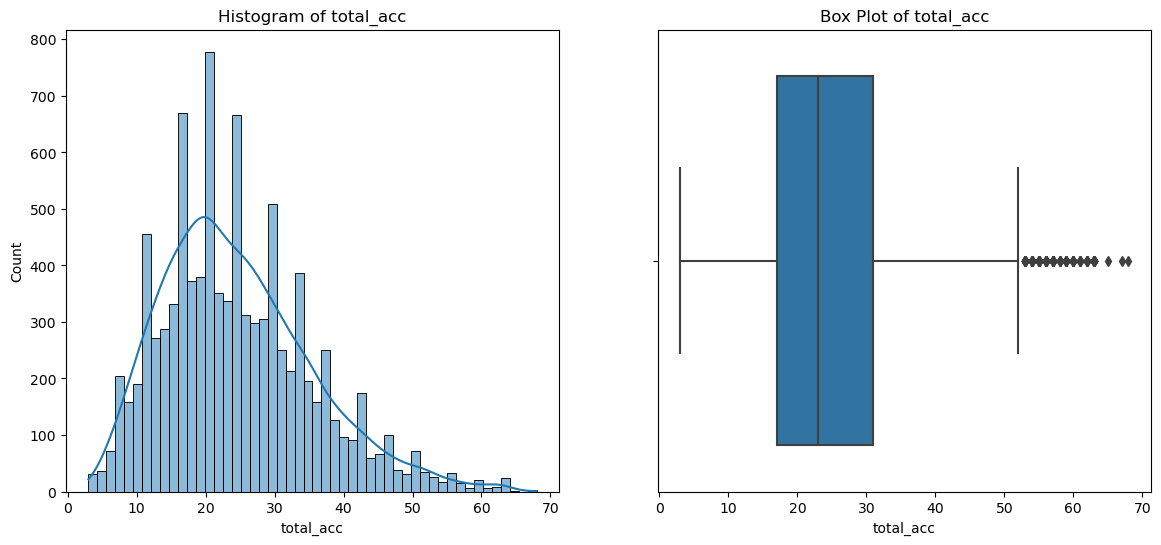

476 null values


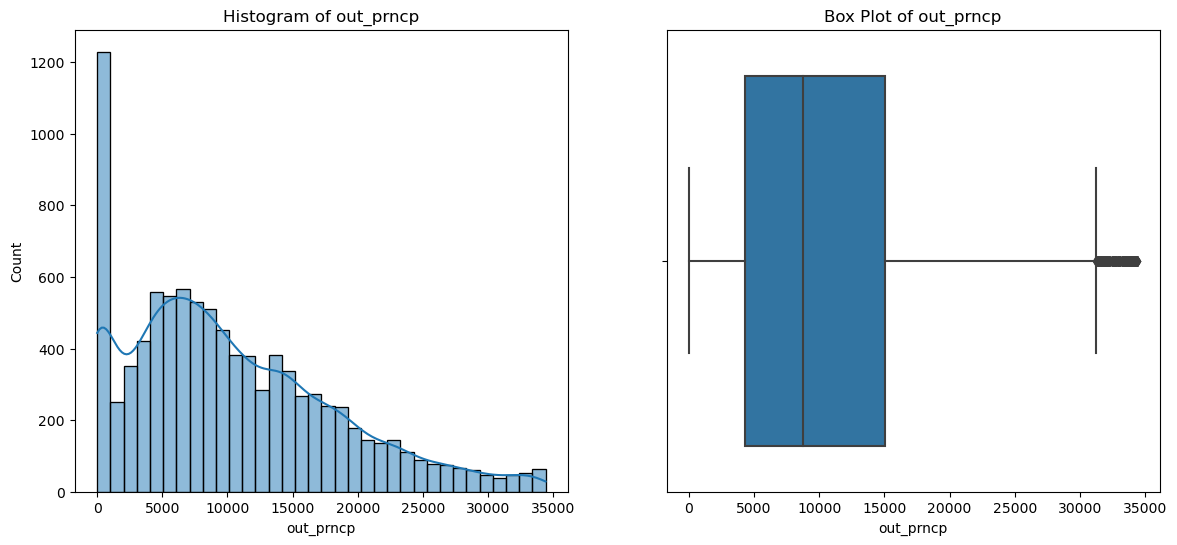

476 null values


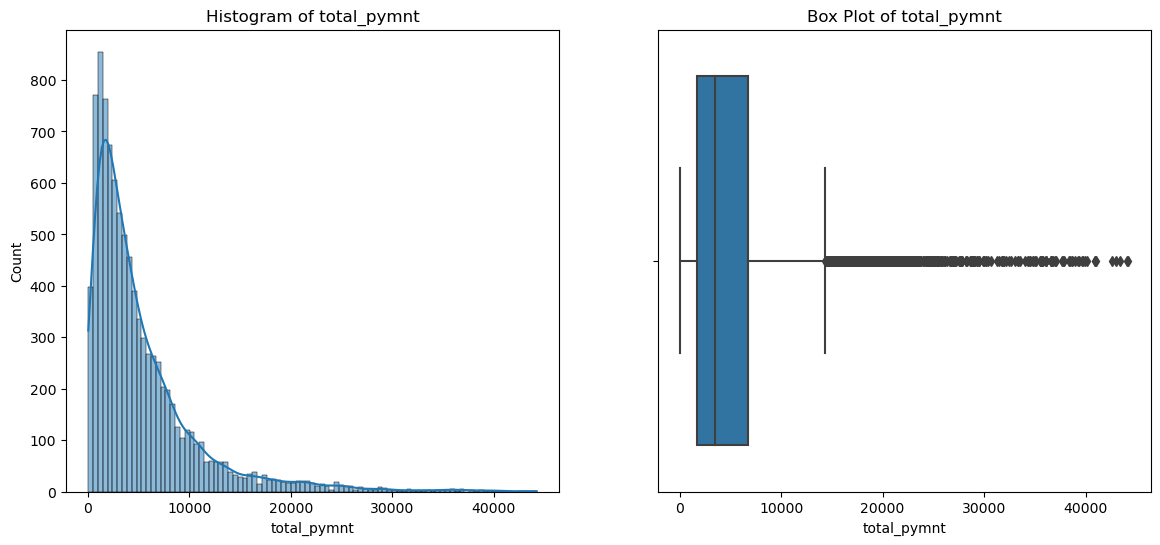

476 null values


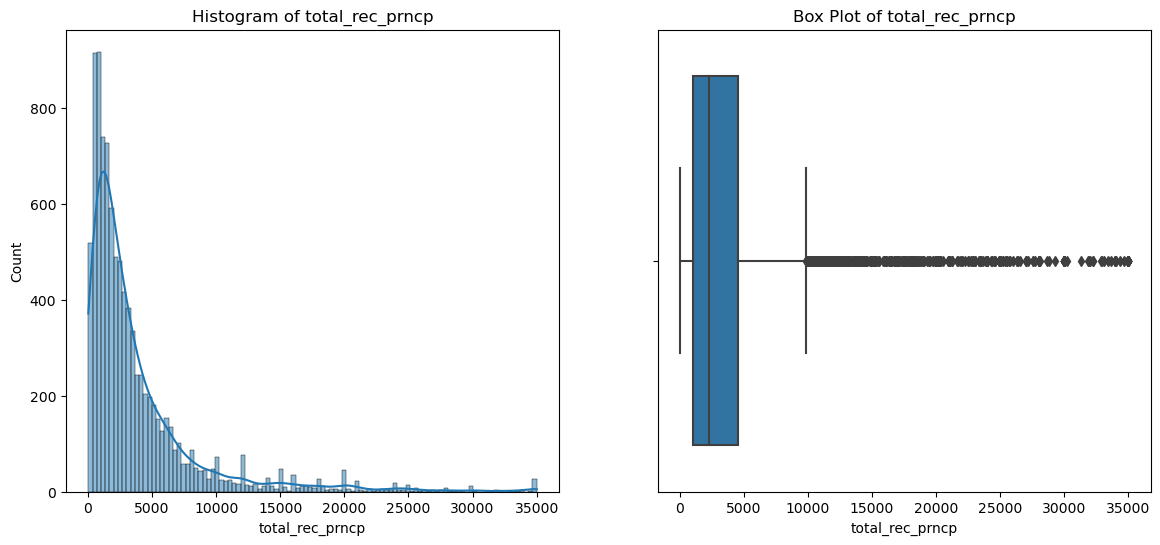

476 null values


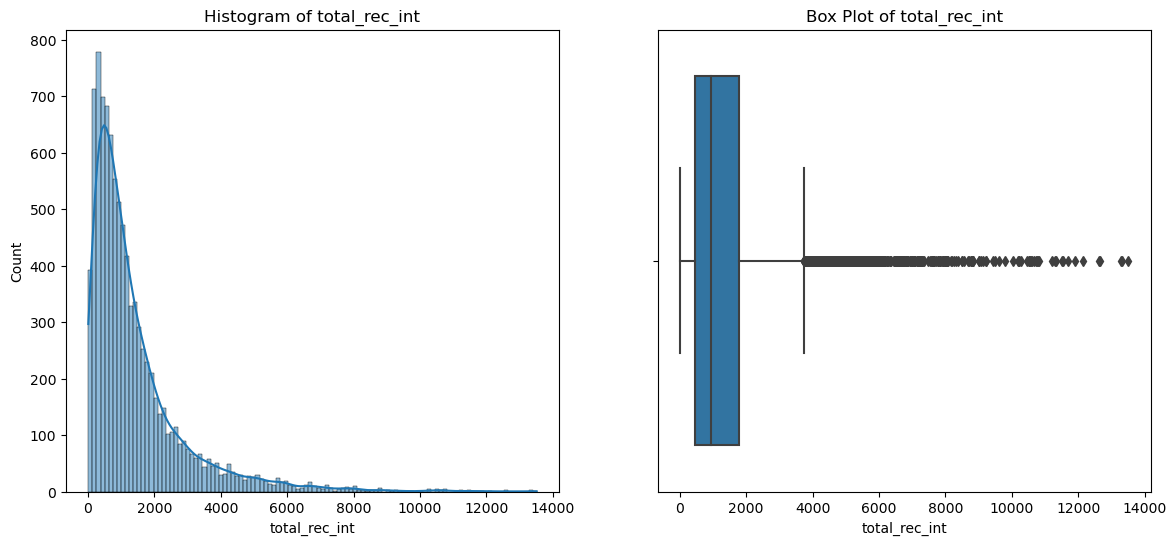

476 null values


In [10]:
#Plot the Histrogram and Box-plot of each columns to observe the dirtribution
for col in numeric_columns:
    plt.figure(figsize=(14, 6))
    
    #Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Histogram of {col}')
    
    #Box-Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Box Plot of {col}')
    
    plt.show()
    
    #Show that how many null they have
    print(df[col].isnull().sum(), "null values")


Numerical columns:

    Most of them are right-skewed b/c they contains outliers.



columns w/ outliers and contain missing values: 

    installment, annual_inc, delinq_2yrs, open_acc, revol_bal , total_acc, out_prncp, total_pymnt, total_rec_prncp, total_rec_int

columns w/o outliers and contain missing values: 

    int_rate, dti

columns w/o outliers and not contain missing values: 

    loan_amnt, funed_amnt

**Note that mths_since_last_delinq contains 59% of missing values (which is too much and imputation might not be effective)

In [11]:
#Impute missing values (numerical)

#installment
median_installment = df['installment'].median()
df['installment'].fillna(median_installment, inplace=True)

#annual_inc
median_annual_inc = df['annual_inc'].median()
df['annual_inc'].fillna(median_annual_inc, inplace = True)

#delinq_2yrs
median_delinq_2yrs = df['delinq_2yrs'].median()
df['delinq_2yrs'].fillna(median_delinq_2yrs, inplace= True)


#open_acc
median_open_acc = df['open_acc'].median()
df['open_acc'].fillna(median_open_acc, inplace= True)

#revol_bal
median_revol_bal = df['revol_bal'].median()
df['revol_bal'].fillna(median_revol_bal, inplace=True)

#total_acc
median_total_acc = df['total_acc'].median()
df['total_acc'].fillna(median_total_acc, inplace=True)

#total_pymnt
median_total_pymnt = df['total_pymnt'].median()
df['total_pymnt'].fillna(median_total_pymnt, inplace= True)

#total_rec_prncp
median_total_rec_prncp = df['total_rec_prncp'].median()
df['total_rec_prncp'].fillna(median_total_rec_prncp,inplace= True)

#total_rec_int
median_total_rec_int = df['total_rec_int'].median()
df['total_rec_int'].fillna(median_total_rec_int, inplace= True)

#out_prncp
median_out_prncp = df['out_prncp'].median()
df['out_prncp'].fillna(median_out_prncp, inplace= True)

#dti
mean_dti = df['dti'].mean()
df['dti'].fillna(mean_dti, inplace= True)

#int_rate
mean_int_rate = df['int_rate'].mean()
df['int_rate'].fillna(mean_int_rate, inplace= True)

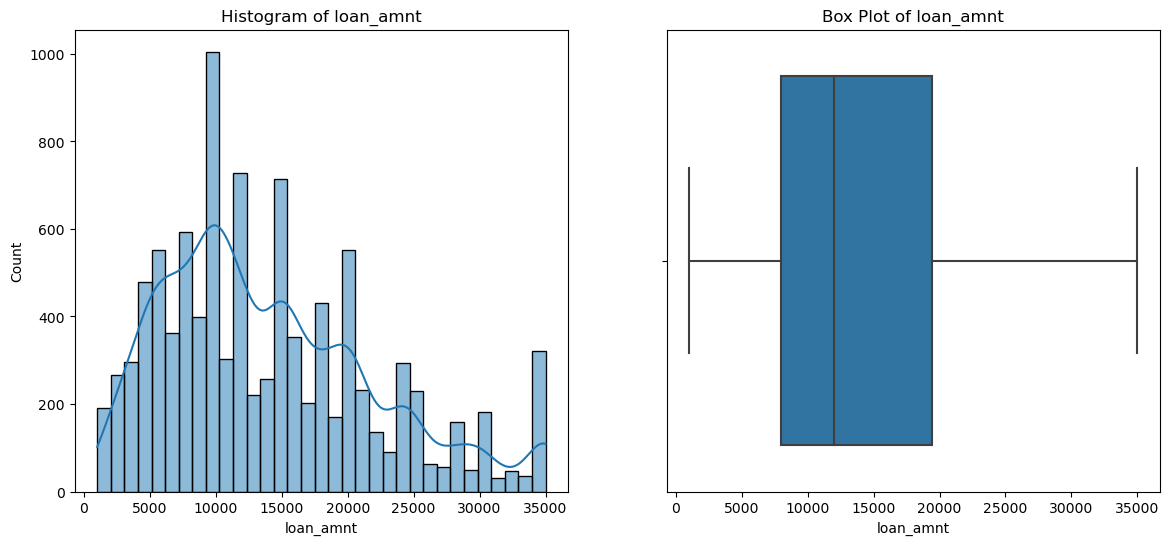

0 null values


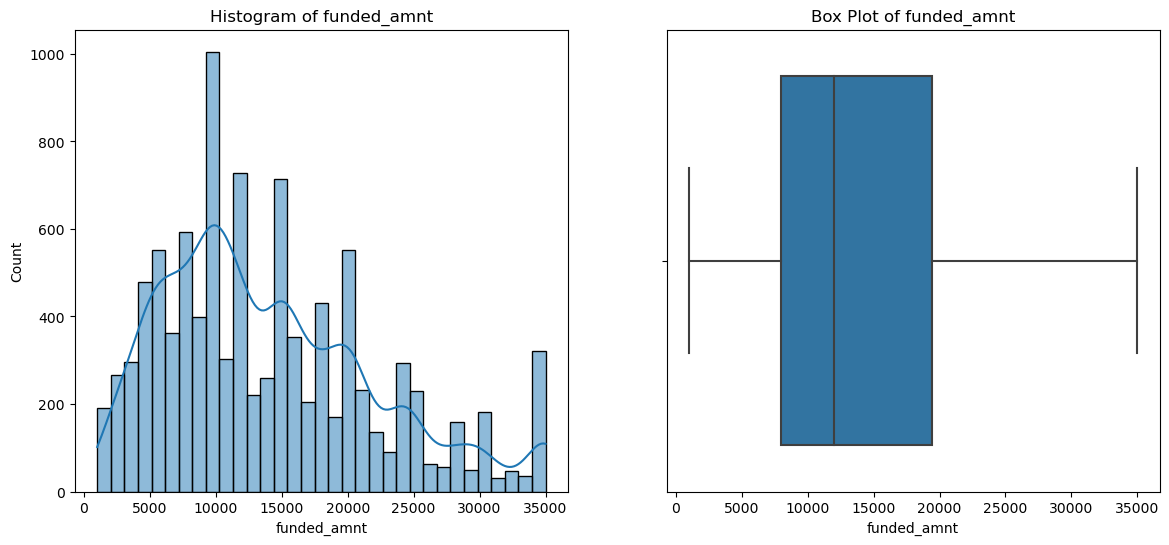

0 null values


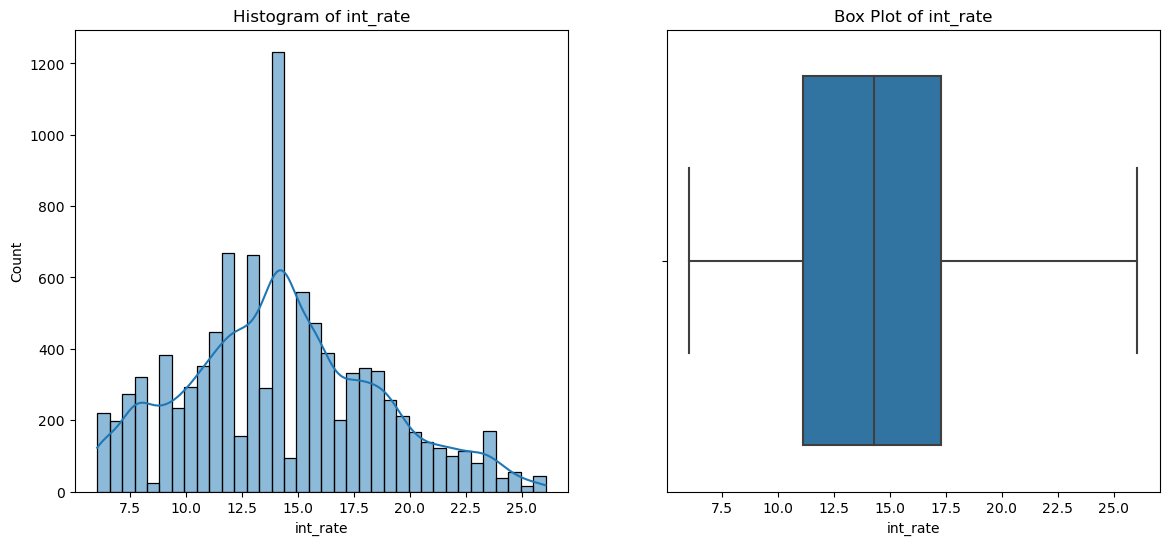

0 null values


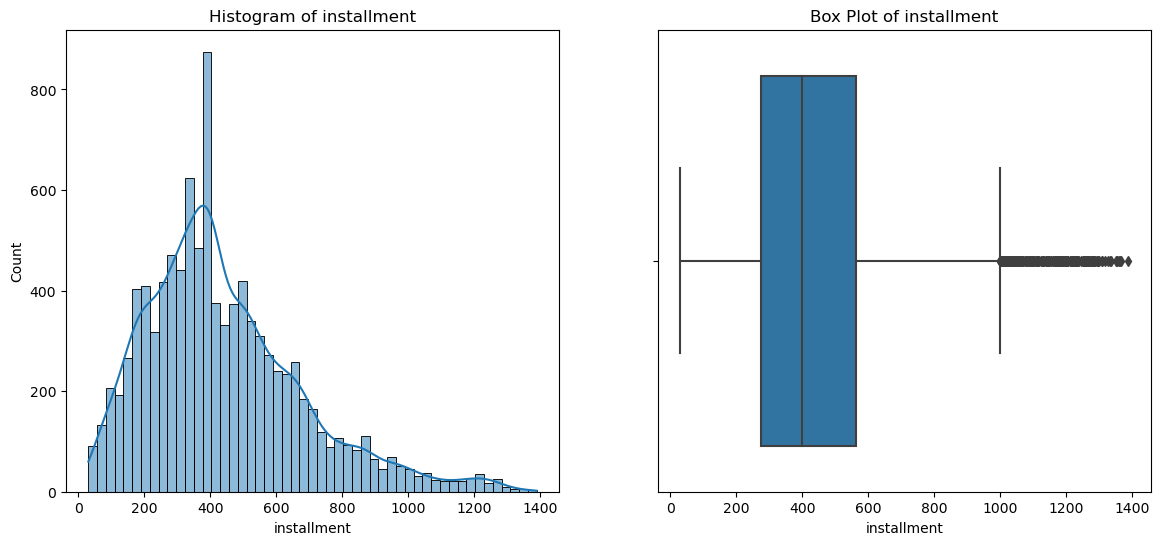

0 null values


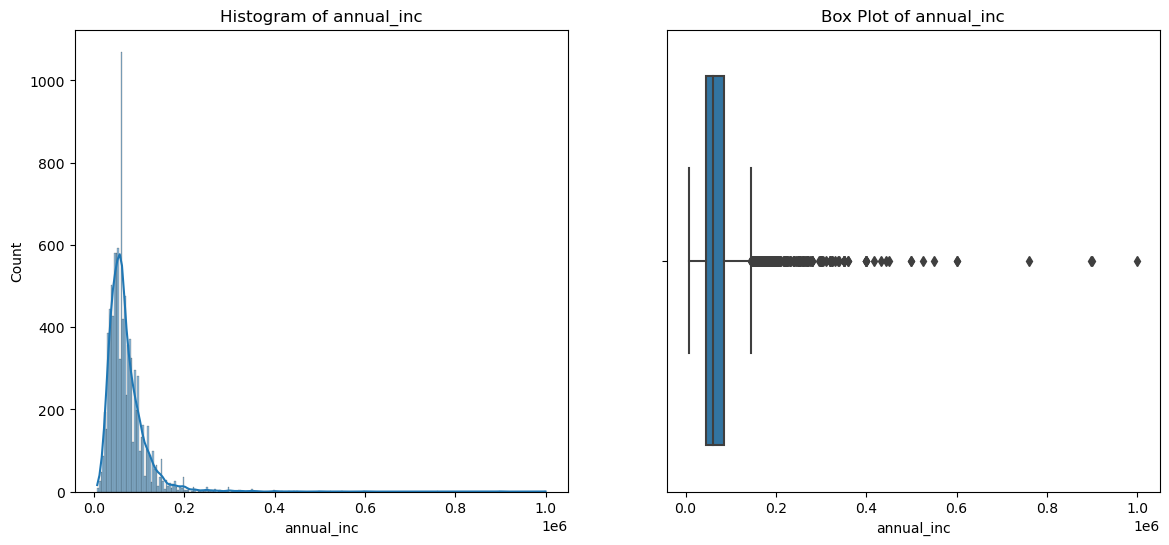

0 null values


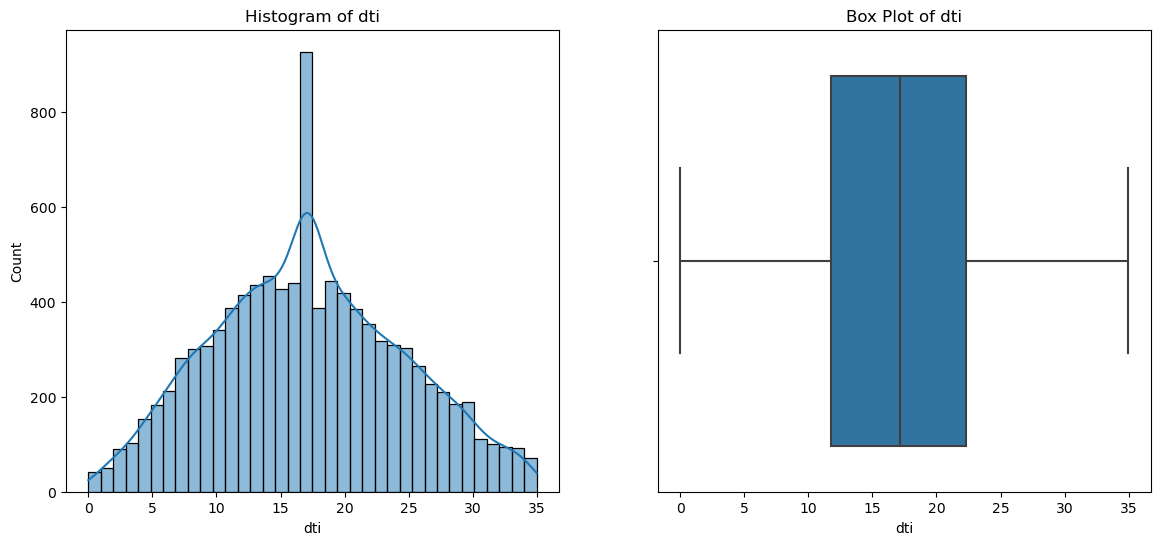

0 null values


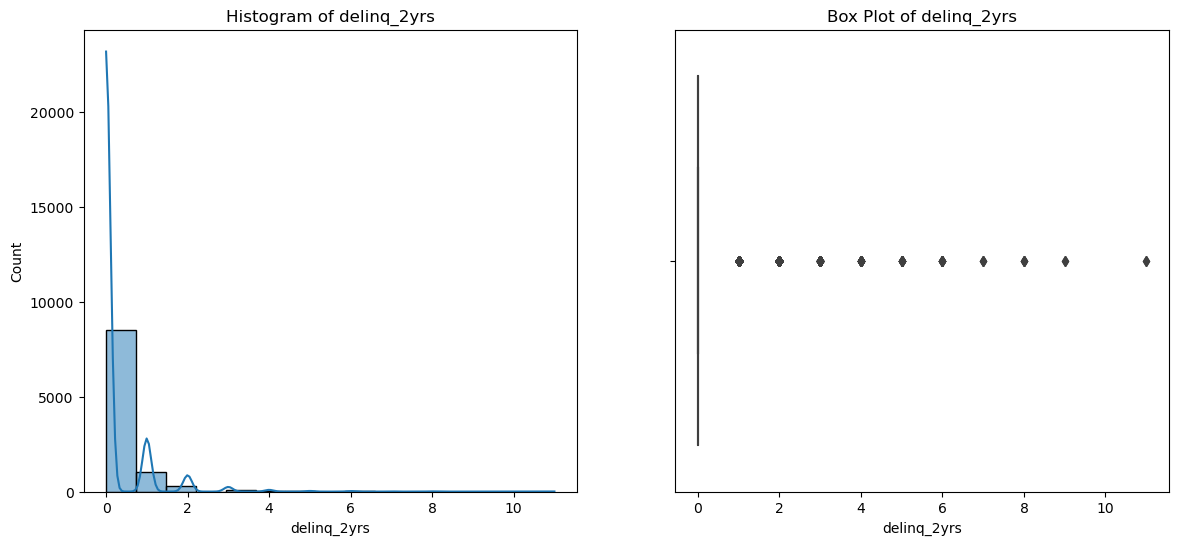

0 null values


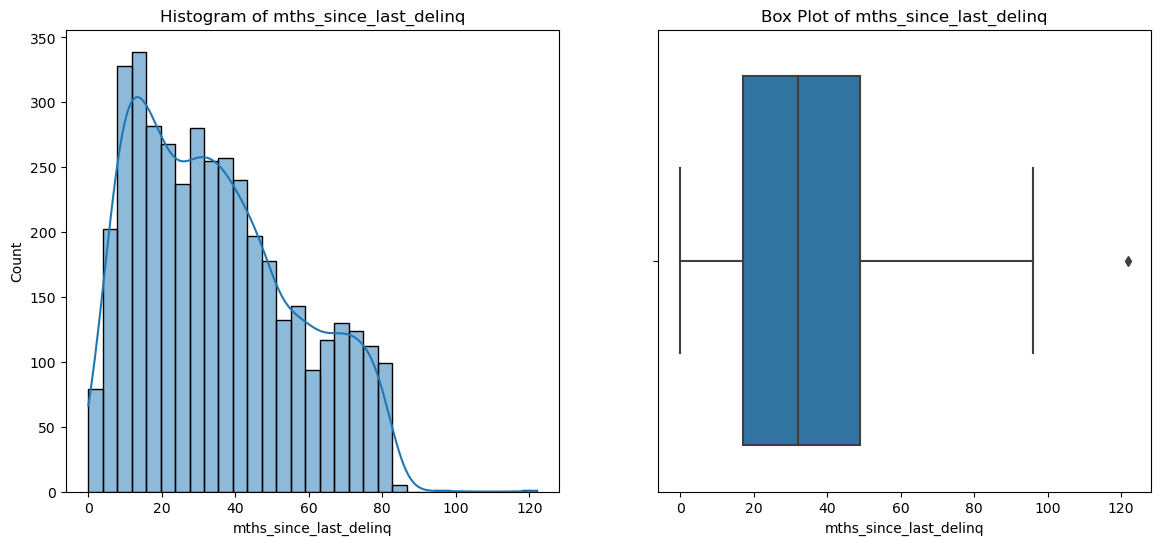

5900 null values


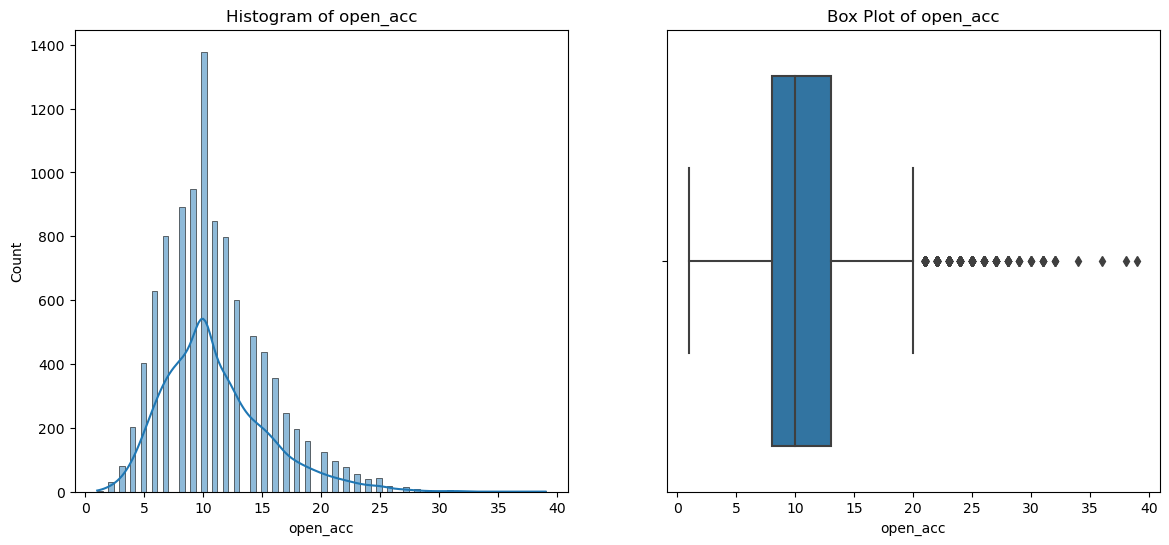

0 null values


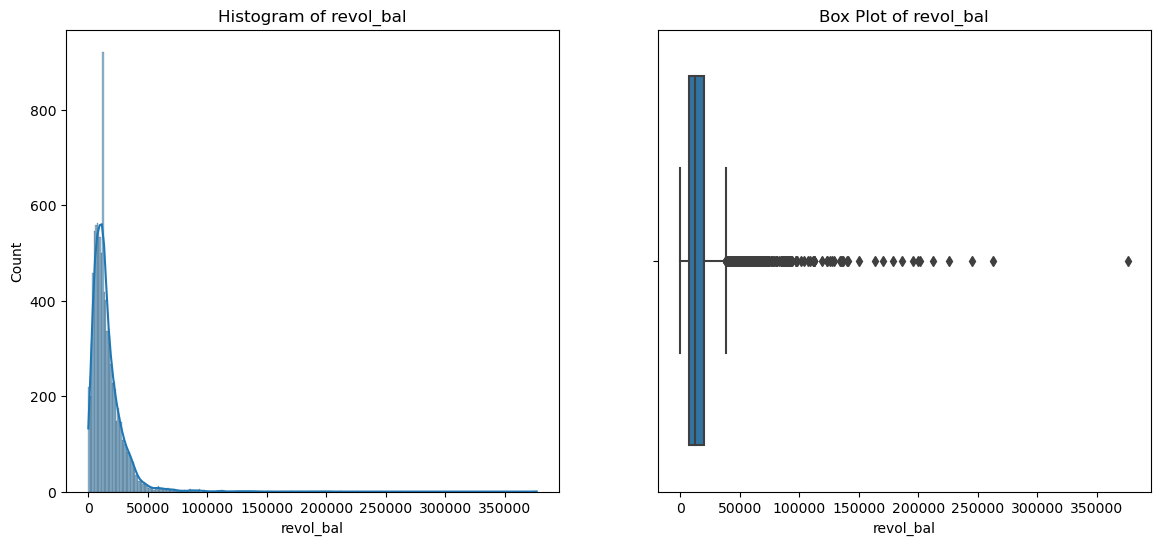

0 null values


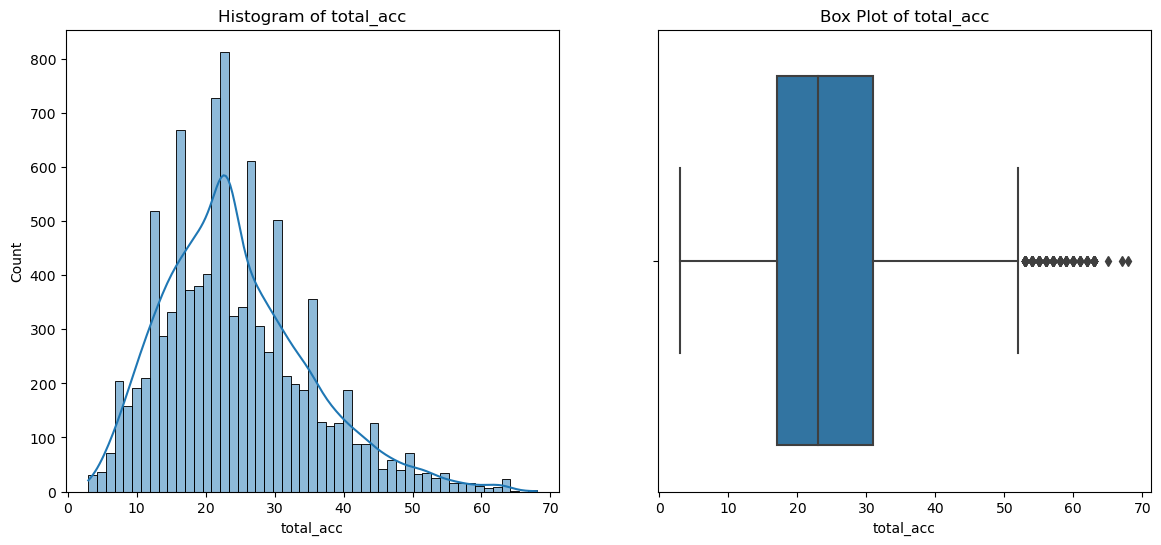

0 null values


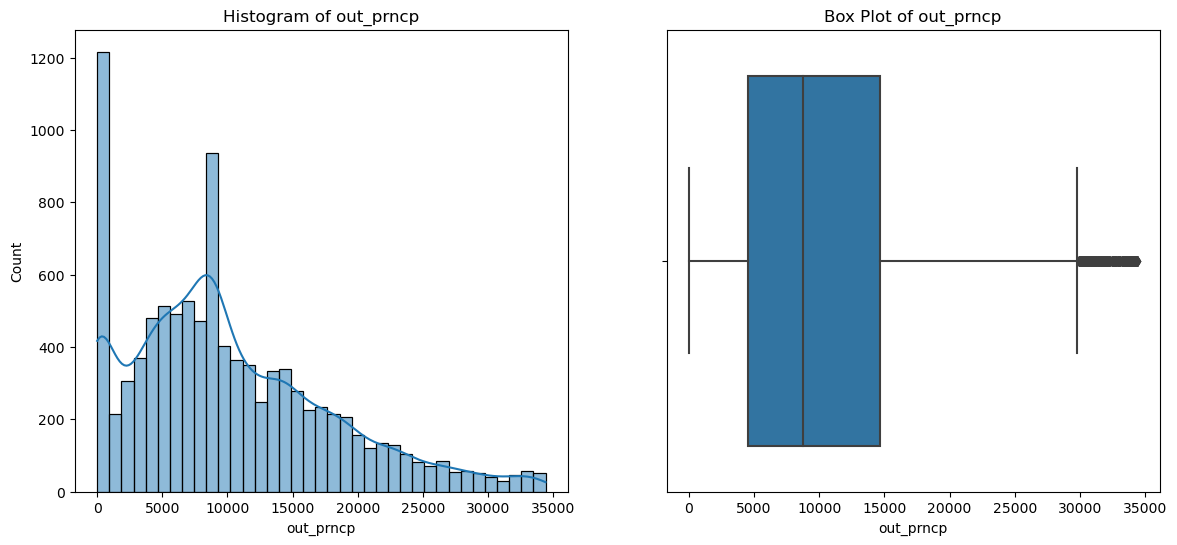

0 null values


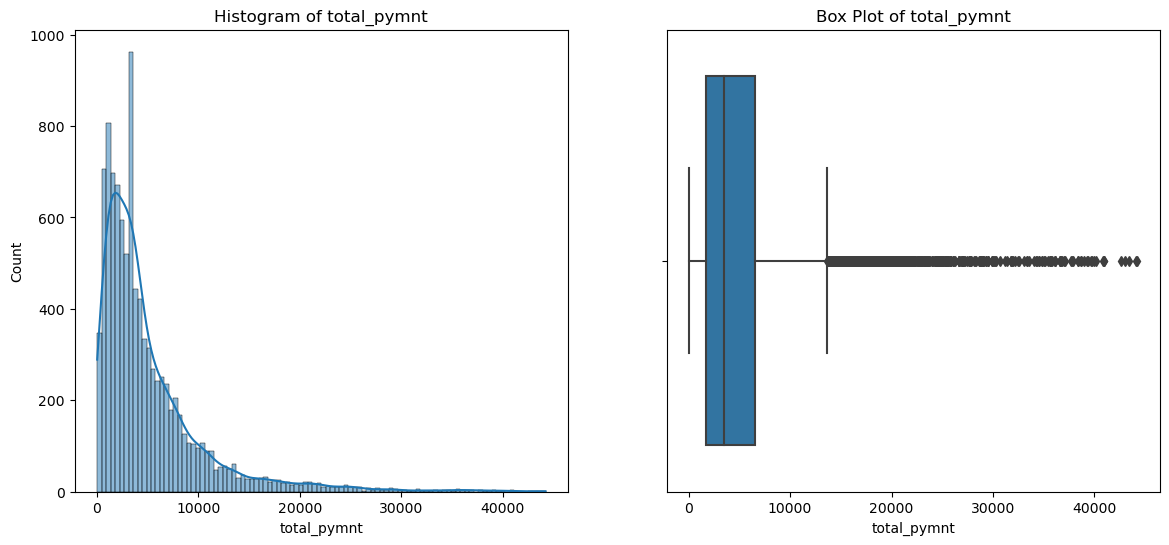

0 null values


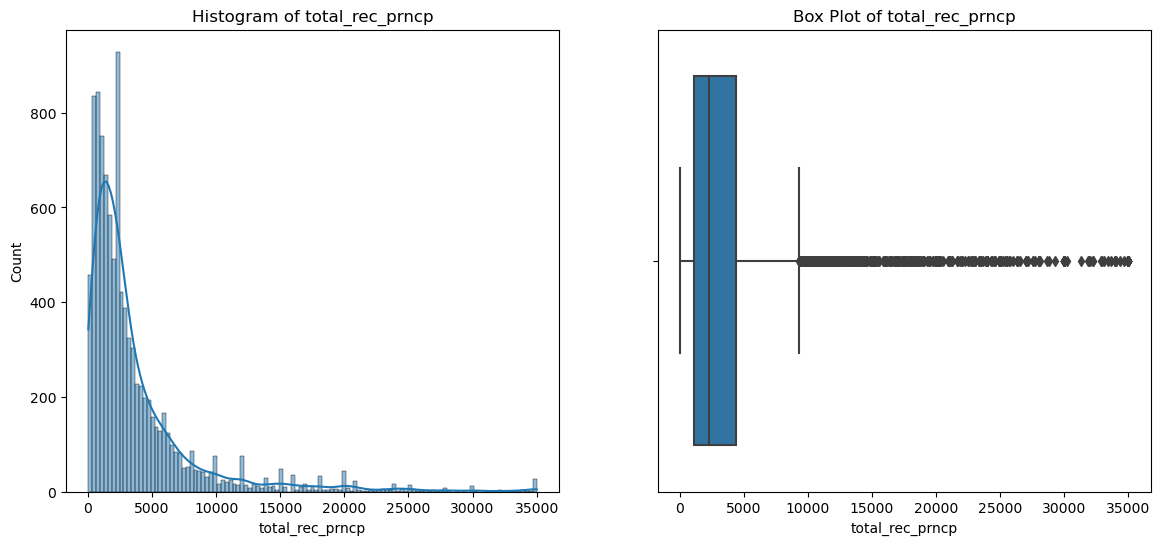

0 null values


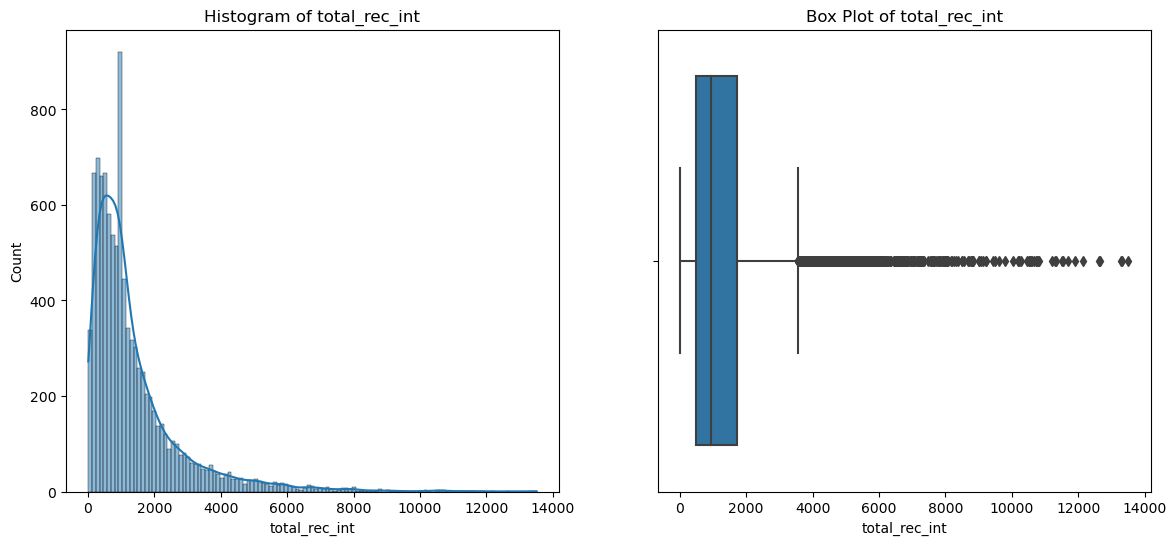

0 null values


In [12]:
#Check distribution of numeric columns again after imputation.

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_columns:
    plt.figure(figsize=(14, 6))
    
    #Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    
    #Box-Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    
    plt.show()
    print(df[col].isnull().sum() , "null values")

In [13]:
df.describe()

,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,revol_bal,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9524,4100.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14054.807500,14052.73000,14.277852,440.526655,71148.538438,17.146927,0.227400,1997-08-31 17:20:07.081058304,34.988537,10.994100,15816.969500,24.445400,10181.881566,5143.121381,3733.739261,1390.717433
min,1000.000000,1000.00000,6.030000,30.440000,7500.000000,0.000000,0.000000,1960-10-05 01:07:00,0.000000,1.000000,0.000000,3.000000,0.000000,34.140000,22.500000,11.640000
25%,8000.000000,8000.00000,11.140000,274.710000,45000.000000,11.790000,0.000000,1994-03-01 23:49:45,17.000000,8.000000,7400.000000,17.000000,4498.610000,1755.620000,1073.055000,486.737500
50%,12000.000000,12000.00000,14.277852,398.510000,61000.000000,17.146927,0.000000,1999-01-26 09:12:00,32.000000,10.000000,12495.000000,23.000000,8745.425000,3500.040000,2237.870000,947.000000
75%,19400.000000,19400.00000,17.270000,564.435000,85000.000000,22.270000,0.000000,2002-07-09 08:23:30,49.000000,13.000000,19950.500000,31.000000,14665.317500,6526.942500,4352.965000,1713.497500
max,35000.000000,35000.00000,26.060000,1388.450000,1000000.000000,34.980000,11.000000,2010-11-16 12:00:00,122.000000,39.000000,376679.000000,68.000000,34413.520000,44231.080000,35000.010000,13514.550000
std,8108.658728,8107.69323,4.323425,238.815761,44328.030652,7.408699,0.676709,NaN,21.474509,4.456686,14830.587283,10.630293,7778.076223,5379.538745,4697.739806,1456.729876


In [14]:
df.isnull().sum()

id                           0
loan_amnt                    0
funded_amnt                  0
term                       476
int_rate                     0
installment                  0
emp_length                 881
home_ownership             476
annual_inc                   0
loan_status                476
purpose                    476
addr_state                   0
dti                          0
delinq_2yrs                  0
earliest_cr_line           476
mths_since_last_delinq    5900
open_acc                     0
revol_bal                    0
total_acc                    0
out_prncp                    0
total_pymnt                  0
total_rec_prncp              0
total_rec_int                0
dtype: int64

categorical columns: emp_length, home_ownership, loan_status, purpose, earliest_cr_line 

In [15]:
#home_ownership
df['home_ownership'].fillna('Not Specify', inplace=True)

#loan_status
df['loan_status'].fillna('Not Specify', inplace=True)

#purpose
df['purpose'].fillna('Not Specify', inplace= True)

#term
df['term'].fillna('Not Specify', inplace= True)


In [16]:
#In my opinion, I decided not to change the below column into numeric and inputed them because it will has an effect to the correctness of personal data.

#emp_length
df['emp_length'].fillna('Not Specify', inplace= True)



Next, I need to classify good loans and bad loans by grouping the loan_status

In [17]:
unique_loan_statuses = df['loan_status'].unique()
print(unique_loan_statuses)

['Current' 'Fully Paid' 'Late (31-120 days)' 'Charged Off'
 'Late (16-30 days)' 'In Grace Period' 'Default' 'Not Specify']


In [18]:
# New columns for classify the performance
conditions = [
    df['loan_status'].isin(['Current', 'Fully Paid']),
    df['loan_status'].isin(['Default', 'In Grace Period', 'Late' ,'Late (16-30 days)', 'Late (31-120 days)' , 'Charged Off'])
]

choices = ['Good', 'Bad']


df['loan_performance'] = pd.Series(np.select(conditions, choices, default= 'Not Specify'))


print(df[['loan_status', 'loan_performance']].head(20))


           loan_status loan_performance
0              Current             Good
1              Current             Good
2              Current             Good
3           Fully Paid             Good
4   Late (31-120 days)              Bad
5              Current             Good
6           Fully Paid             Good
7              Current             Good
8              Current             Good
9   Late (31-120 days)              Bad
10          Fully Paid             Good
11             Current             Good
12             Current             Good
13             Current             Good
14             Current             Good
15             Current             Good
16             Current             Good
17         Charged Off              Bad
18         Charged Off              Bad
19             Current             Good


In [19]:
#Compare amount of good loans to bad loans
loan_status_counts = df['loan_performance'].value_counts()
print(loan_status_counts)

loan_performance
Good           9073
Not Specify     476
Bad             451
Name: count, dtype: int64


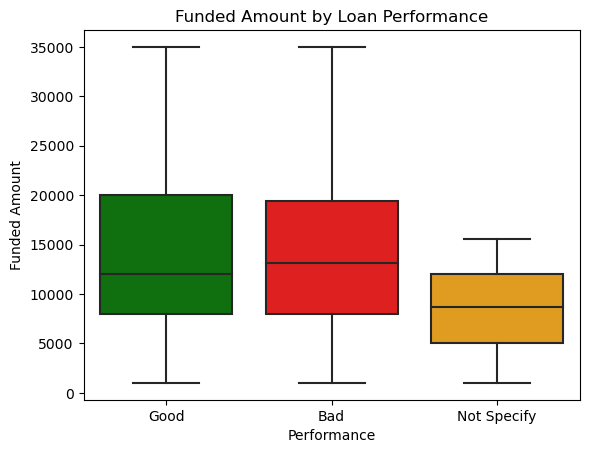

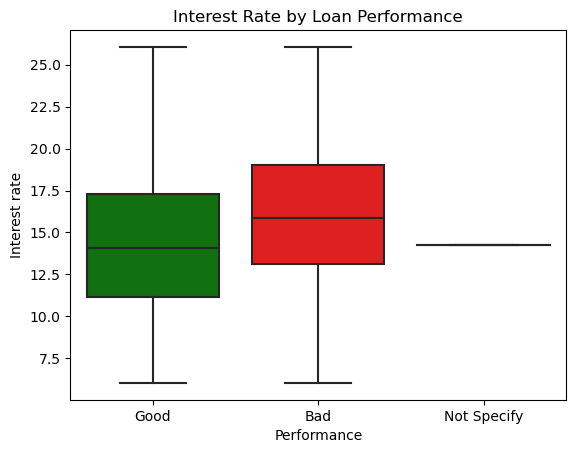

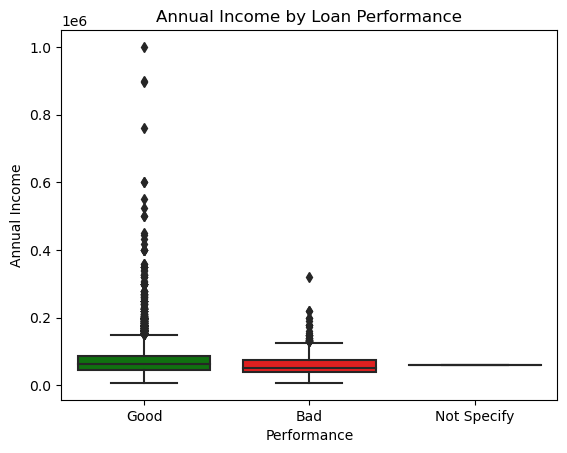

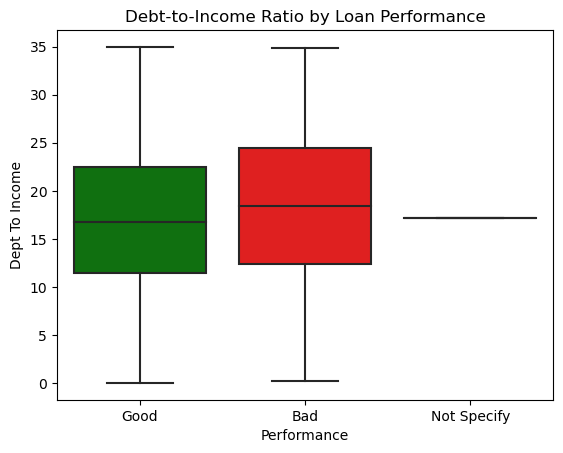

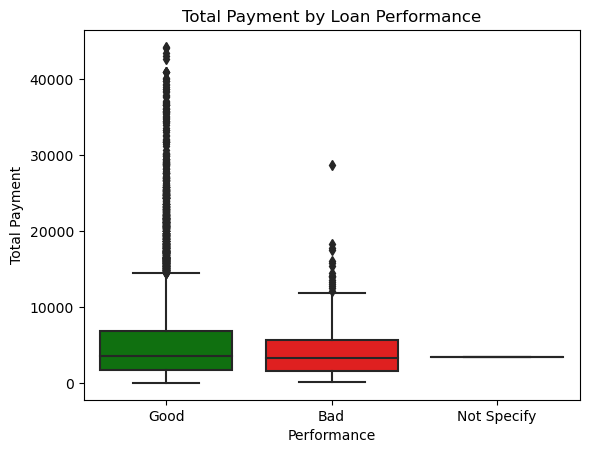

In [20]:
#Comparison using Box-plot to observe the statistical values

custom_palette = {'Good': 'green', 'Bad': 'red', 'Not Specify': 'orange'}

# funded_amount vs loan_performance
sns.boxplot(x='loan_performance', y='funded_amnt', data=df, palette = custom_palette)
plt.title('Funded Amount by Loan Performance')
plt.xlabel('Performance')
plt.ylabel('Funded Amount')
plt.show()

# int_rate vs loan_performance
sns.boxplot(x='loan_performance', y='int_rate', data=df, palette = custom_palette)
plt.title('Interest Rate by Loan Performance')
plt.xlabel('Performance')
plt.ylabel('Interest rate')
plt.show()

# annual_inc vs loan_performance
sns.boxplot(x='loan_performance', y='annual_inc', data=df, palette = custom_palette)
plt.title('Annual Income by Loan Performance')
plt.xlabel('Performance')
plt.ylabel('Annual Income')
plt.show()

# dti vs loan_performance
sns.boxplot(x='loan_performance', y='dti', data=df, palette = custom_palette)
plt.title('Debt-to-Income Ratio by Loan Performance')
plt.xlabel('Performance')
plt.ylabel('Dept To Income')
plt.show()

# total_pymnt vs loan_performance
sns.boxplot(x='loan_performance', y='total_pymnt', data=df, palette = custom_palette)
plt.title('Total Payment by Loan Performance')
plt.xlabel('Performance')
plt.ylabel('Total Payment')
plt.show()

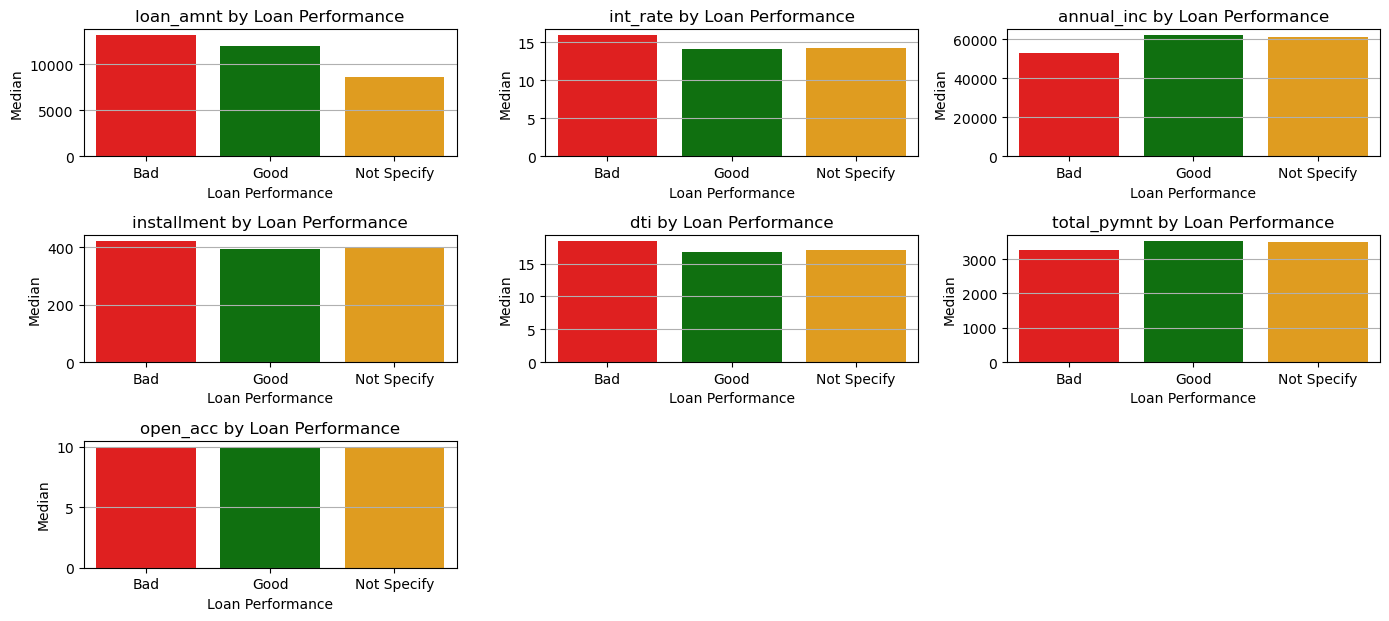

In [21]:

#Compare the median of each features
select_numeric = ['loan_amnt', 'int_rate', 'annual_inc', 'installment', 'dti','total_pymnt','open_acc']

#Group by performance
grouped_selected_data = df.groupby('loan_performance')[select_numeric].median()

custom_palette = {'Good': 'green', 'Bad': 'red', 'Not Specify': 'orange'}


plt.figure(figsize=(14, 10))
for i, col in enumerate(select_numeric, 1):
    plt.subplot(5, 3, i)
    sns.barplot(x=grouped_selected_data.index, y=grouped_selected_data[col], 
                palette=[custom_palette[cat] for cat in grouped_selected_data.index])
    plt.title(f'{col} by Loan Performance')
    plt.xlabel('Loan Performance')
    plt.ylabel(f'Median')
    plt.grid(axis='y')


plt.tight_layout()
plt.show()

Lets explor how many good and bad loans by each purpose of loaning

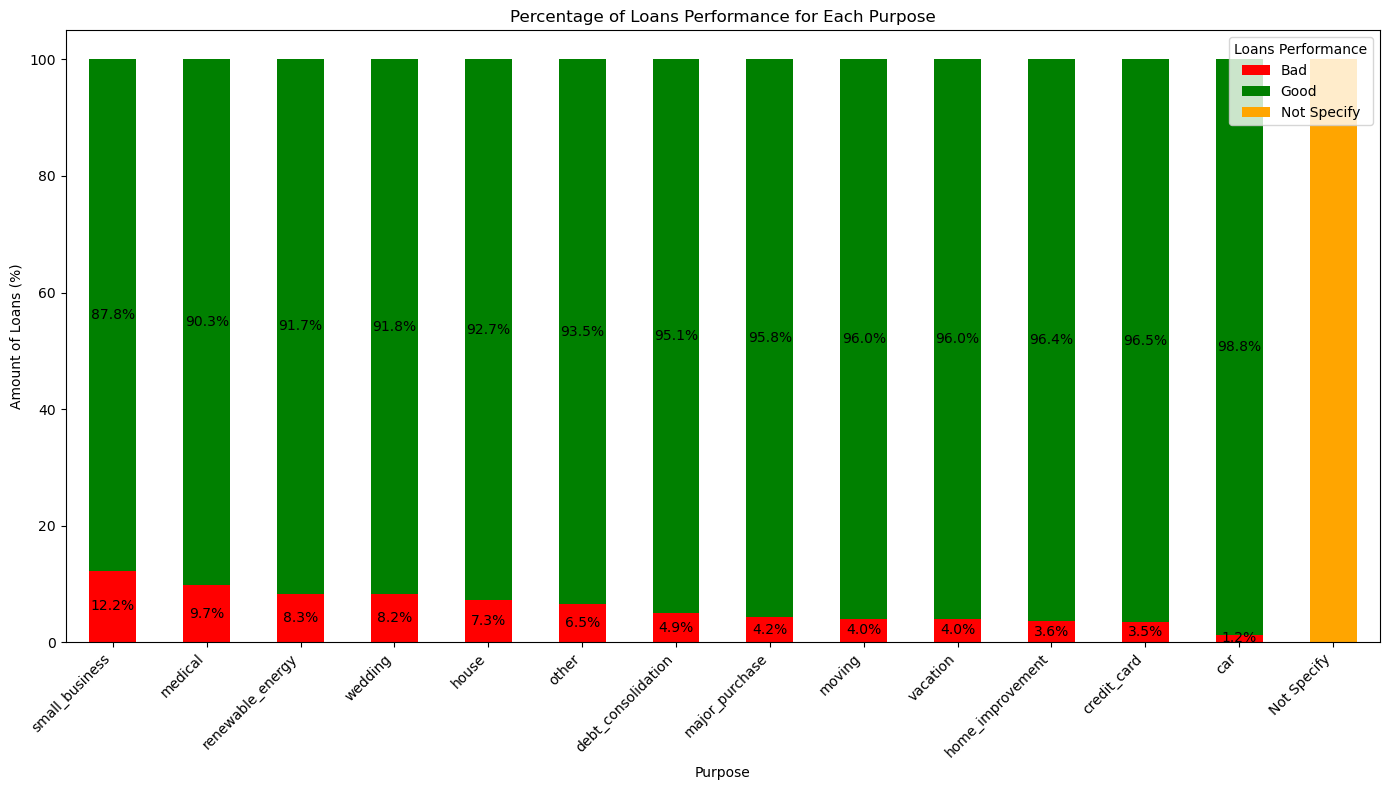

In [22]:
# Count loan performance for each purpose
loan_performance_counts = df.groupby(['purpose', 'loan_performance']).size().unstack(fill_value=0)

# Calculate the percentage and sort
loan_performance_percentages = loan_performance_counts.div(loan_performance_counts.sum(axis=1), axis=0) * 100
loan_performance_percentages = loan_performance_percentages.sort_values(by='Bad', ascending=False)

# Define colors for the performance categories
colors = {'Good': 'green', 'Bad': 'red', 'Not Specify': 'orange'}

# Plot
ax = loan_performance_percentages.plot(kind='bar', stacked=True, figsize=(14, 8), color=[colors[col] for col in loan_performance_percentages.columns])
plt.title('Percentage of Loans Performance for Each Purpose')
plt.xlabel('Purpose')
plt.ylabel('Amount of Loans (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loans Performance')


#Add data labels, exclude "Not Specify"
for container in ax.containers:
    category = container.get_label()
    if category != 'Not Specify':
        for bar in container:
            height = bar.get_height()
            if height > 0:
                ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()

Small business has the highest percentage of bad loans at approx. 12% Followed my medical , renewable energy and wedding respectively

Next, Lets explore the home ownership of good loans and bad loans

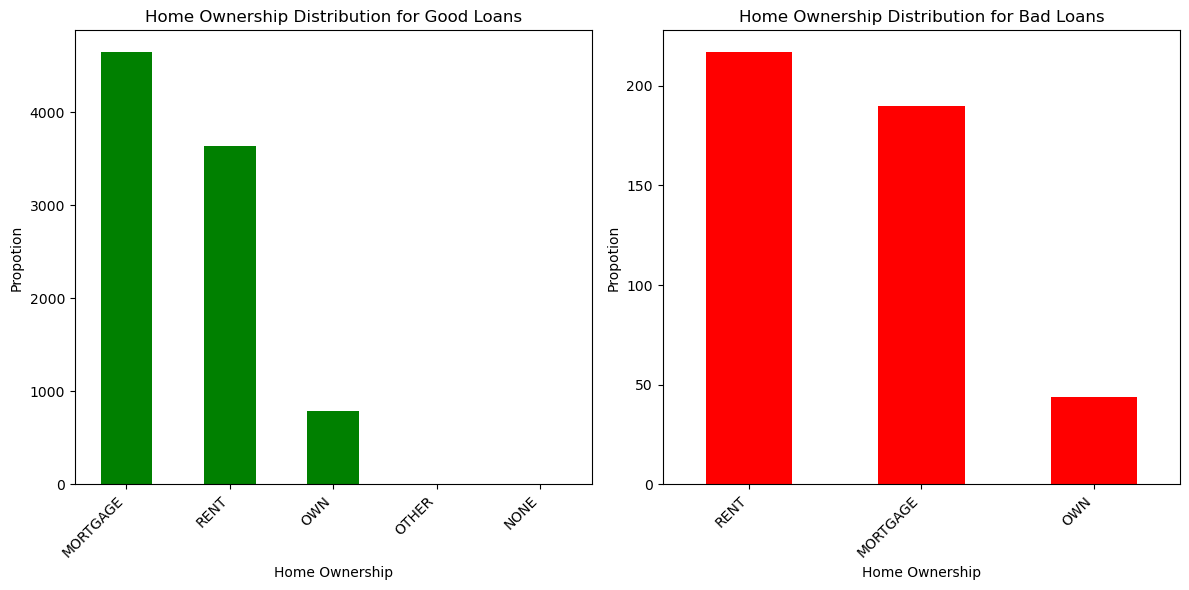

In [23]:
good_loans = df[df['loan_performance'] == 'Good']
bad_loans = df[df['loan_performance'] == 'Bad']

# Count good loans
good_home_ownership_counts = good_loans['home_ownership'].value_counts()

# Count bad loans
bad_home_ownership_counts = bad_loans['home_ownership'].value_counts()

# Plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
good_home_ownership_counts.plot(kind='bar', color='green')
plt.title('Home Ownership Distribution for Good Loans')
plt.xlabel('Home Ownership')
plt.ylabel('Propotion')
plt.xticks(rotation=45, ha= 'right')

plt.subplot(1, 2, 2)
bad_home_ownership_counts.plot(kind='bar', color='red')
plt.title('Home Ownership Distribution for Bad Loans')
plt.xlabel('Home Ownership')
plt.ylabel('Propotion')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Lets explore the distribution of good and bad loans in each state to observe the different.

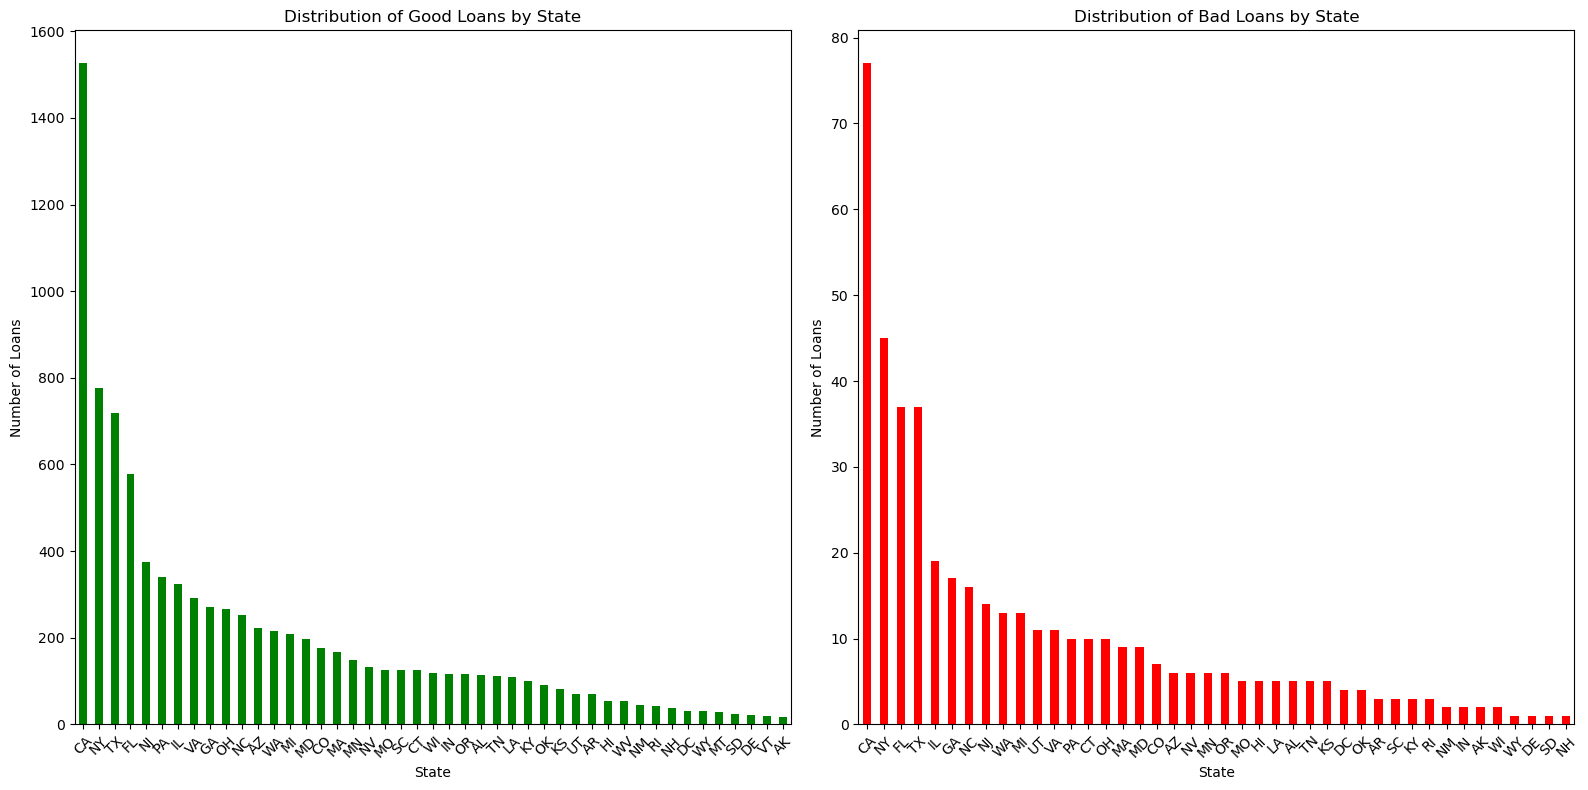

In [24]:
# Count number of loans for each state 
good_loan_address_counts = good_loans['addr_state'].value_counts()
bad_loan_address_counts = bad_loans['addr_state'].value_counts()

# Plot
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
good_loan_address_counts.plot(kind='bar', color='green')
plt.title('Distribution of Good Loans by State')
plt.xlabel('State')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45, ha = 'center')

plt.subplot(1, 2, 2)
bad_loan_address_counts.plot(kind='bar', color='red')
plt.title('Distribution of Bad Loans by State')
plt.xlabel('State')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45, ha = 'center')

plt.tight_layout()
plt.show()

Explore the relationship between each features by calculating the correlation and represent in heatmap

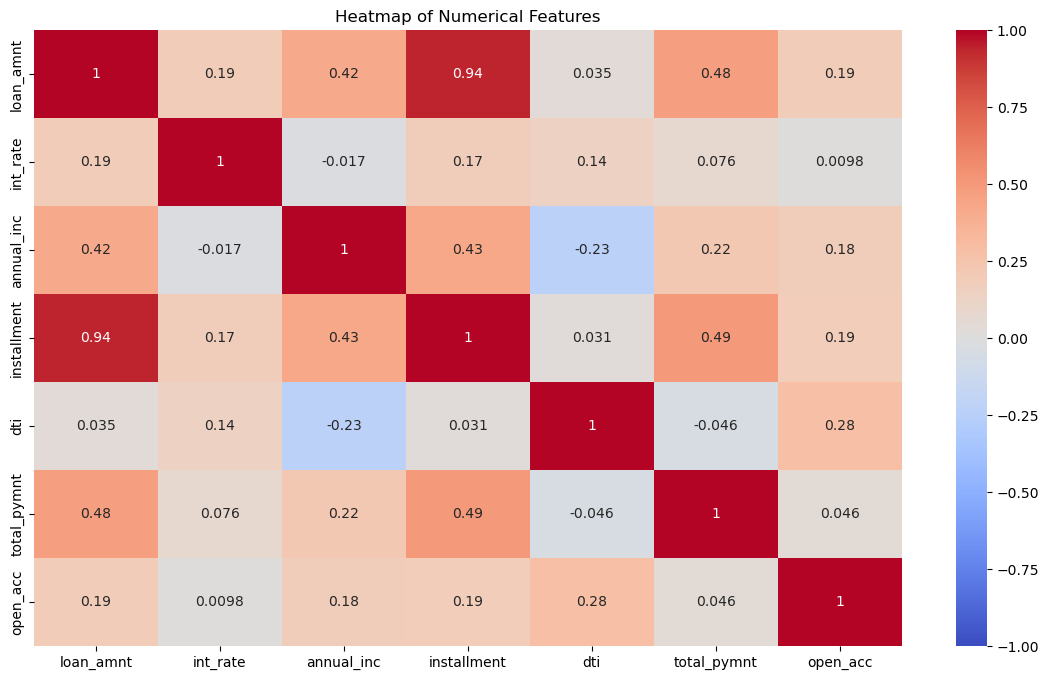

In [25]:
# List of numerical features
select_numeric = ['loan_amnt', 'int_rate', 'annual_inc', 'installment', 'dti', 'total_pymnt', 'open_acc']

# Calculate the correlation matrix
correlation_matrix = df[select_numeric].corr()

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Numerical Features')
plt.show()

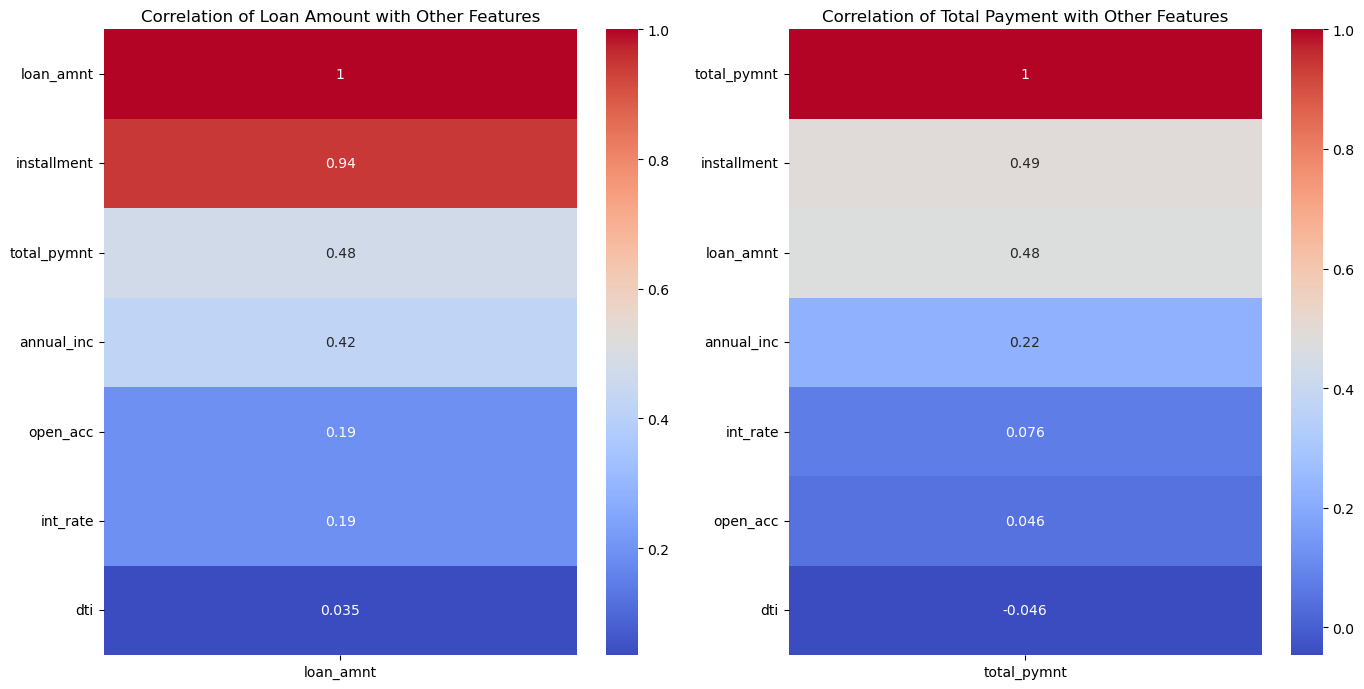

In [26]:
select_numeric = ['loan_amnt', 'int_rate', 'annual_inc', 'installment', 'dti','total_pymnt','open_acc']

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.heatmap(df[select_numeric].corr()[['loan_amnt']].sort_values(by='loan_amnt', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Loan Amount with Other Features')


plt.subplot(1, 2, 2)
sns.heatmap(df[select_numeric].corr()[['total_pymnt']].sort_values(by='total_pymnt', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Total Payment with Other Features')


plt.tight_layout()
plt.show()

Explore the correlation of each features between good loans and bad loans

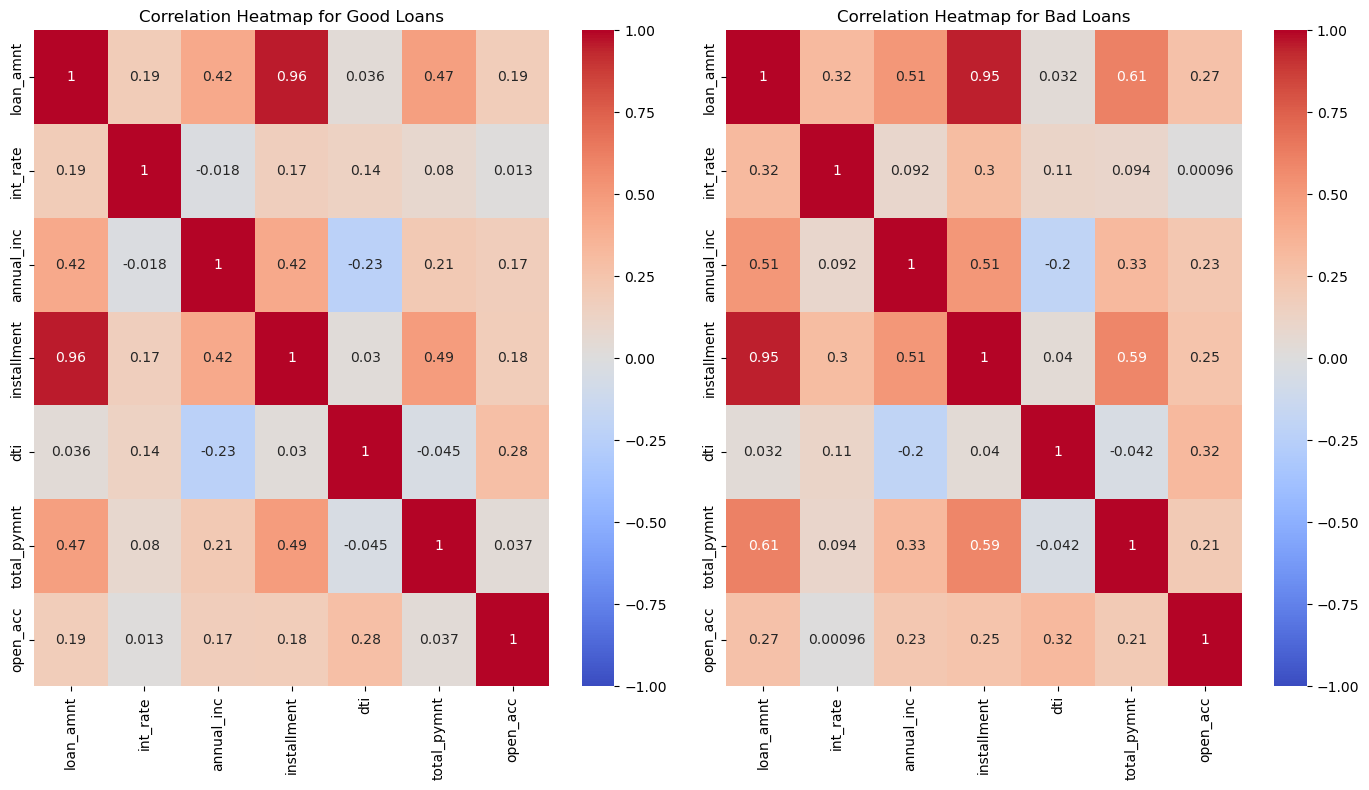

In [27]:
good_loans = df[df['loan_performance'] == 'Good']
bad_loans = df[df['loan_performance'] == 'Bad']

# Select col to plot
selected_columns = ['loan_amnt', 'int_rate', 'annual_inc', 'installment', 'dti','total_pymnt','open_acc']

# Calculte correlation
good_loans_corr = good_loans[selected_columns].corr()

bad_loans_corr = bad_loans[selected_columns].corr()

# Plot
plt.figure(figsize=(14, 8))

# Good
plt.subplot(1, 2, 1)
sns.heatmap(good_loans_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Good Loans')

# Bad
plt.subplot(1, 2, 2)
sns.heatmap(bad_loans_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Bad Loans')

plt.tight_layout()
plt.show()

The rest of visualizations will be conducted in PowerBI, So I can see the different perspective of analysis by building interactive dashboard

In [28]:
from sklearn.linear_model import LinearRegression


X = df[['loan_amnt', 'annual_inc', 'int_rate', 'open_acc']]
y = df['total_pymnt']

model = LinearRegression()
model.fit(X, y)

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


Coefficients: [ 3.15086392e-01  3.76176140e-03 -1.68960876e+01 -6.12327779e+01]
Intercept: 1361.4380941177615
